# **CW2 Malaysia Group 1**

Team Members:
- Geraint Wong Wen Horng (H00386098)
- Athin Suresh (H00386653)
- Fico Vincenzio Lie (H00418528)
- V Thanaaysh A/L Vishvanathan (H00391598)


# Part 1 Exploratory Data Visualisation

In [2]:
import pandas as pd
import numpy as np


In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,Score,Text
0,5,I received this product early from the seller!...
1,5,*****<br />Numi's Collection Assortment Melang...
2,5,"I was very careful not to overcook this pasta,..."
3,5,Buying this multi-pack I was misled by the pic...
4,5,These bars are so good! I loved them warmed up...


In [5]:
print(train.columns)
print(train["Score"].value_counts())

Index(['Score', 'Text'], dtype='object')
Score
5    197151
4     43876
1     28521
3     23296
2     16287
Name: count, dtype: int64


In [6]:
valid_score = {1, 2, 3, 4, 5}
unique_score = set(train["Score"].unique())

# Find invalid sentiment labels
invalid_score = unique_score - valid_score

if invalid_score:
    print("Unexpected score labels found:", invalid_score)
    invalid_rows = train[train["Score"].isin(invalid_score)]
    print(invalid_rows)
else:
    print("All sentiments are correctly labeled.")

All sentiments are correctly labeled.


In [7]:
train.describe()

,Score
count,309131.000000
mean,4.180241
std,1.312151
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


C:\Users\Athin Suresh\AppData\Local\Temp\ipykernel_14196\1363575255.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train["Score"], palette="viridis")


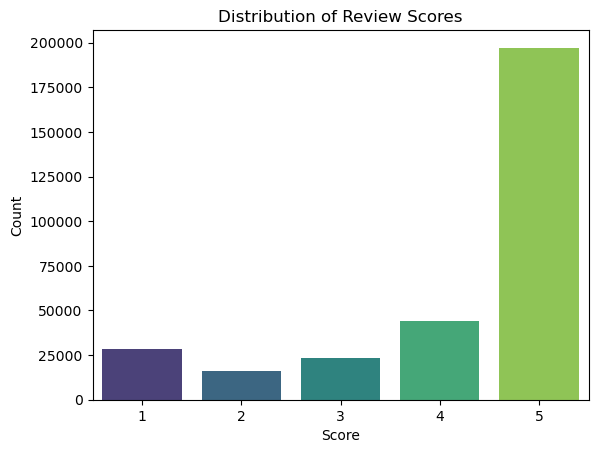

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=train["Score"], palette="viridis")
plt.title("Distribution of Review Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


In [9]:
train['length']=train['Text'].apply(len)
train.head()

,Score,Text,length
0,5,I received this product early from the seller!...,197
1,5,*****<br />Numi's Collection Assortment Melang...,1938
2,5,"I was very careful not to overcook this pasta,...",1084
3,5,Buying this multi-pack I was misled by the pic...,186
4,5,These bars are so good! I loved them warmed up...,155


C:\Users\Athin Suresh\AppData\Local\Temp\ipykernel_14196\1063189245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train["Score"], y=train["length"], palette="viridis")


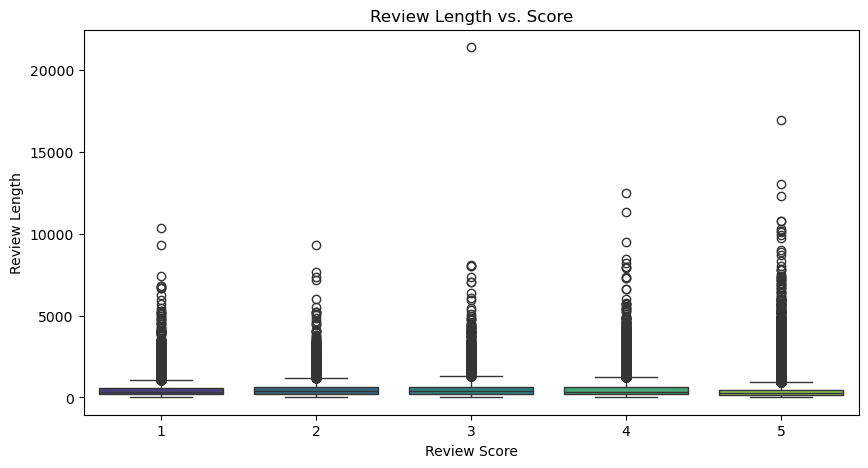

In [10]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x=train["Score"], y=train["length"], palette="viridis")
plt.title("Review Length vs. Score")
plt.xlabel("Review Score")
plt.ylabel("Review Length")
plt.show()

In [11]:
train[["Score", "length"]].corr()

,Score,length
Score,1.000000,-0.068981
length,-0.068981,1.000000


In [12]:
train.head()


,Score,Text,length
0,5,I received this product early from the seller!...,197
1,5,*****<br />Numi's Collection Assortment Melang...,1938
2,5,"I was very careful not to overcook this pasta,...",1084
3,5,Buying this multi-pack I was misled by the pic...,186
4,5,These bars are so good! I loved them warmed up...,155


In [15]:
train.isnull().sum()

Score     0
Text      0
length    0
dtype: int64

# Part 2 Text Preprocessing and Normalisation

In [17]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
data = 'train.csv'
train_df = pd.read_csv(data)
print(train_df.columns)
print(train_df["Text"].head())

Index(['Score', 'Text'], dtype='object')
0    I received this product early from the seller!...
1    *****<br />Numi's Collection Assortment Melang...
2    I was very careful not to overcook this pasta,...
3    Buying this multi-pack I was misled by the pic...
4    These bars are so good! I loved them warmed up...
Name: Text, dtype: object


In [19]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import contractions

# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Converts POS tags to a format recognized by WordNet lemmatizer."""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def preprocess_text(df, text_column='Text'):
    """
    Preprocesses text data by:
    - Converting to lowercase
    - Removing punctuation
    - Removing HTML and URLs
    - Removing digits
    - Expanding contractions
    - Removing stopwords
    - Tokenizing
    - Lemmatizing
    
    Args:
        df (pd.DataFrame): DataFrame containing text data.
        text_column (str): Name of the column containing text.
    
    Returns:
        pd.DataFrame: Processed DataFrame with a new column 'Text_Processed'.
    """
    df = df.copy()
    
    df['Text_Processed'] = df[text_column].replace(r'<a\s+href="http[^"]*">|</a>', '', regex=True)
    
    df['Text_Processed'] = df['Text_Processed'].astype(str).str.lower()
    
    df['Text_Processed'] = df['Text_Processed'].str.translate(str.maketrans('', '', string.punctuation))
    
    # Remove digits
    df['Text_Processed'] = df['Text_Processed'].replace(r'\d+', '', regex=True)
    
    # Expand contractions and remove stopwords
    stop_words = set(stopwords.words('english'))
    def expand_and_remove_stopwords(text):
        expanded_text = contractions.fix(text)
        words = expanded_text.split()
        return ' '.join([word for word in words if word.lower() not in stop_words])
    
    df['Text_Processed'] = df['Text_Processed'].apply(expand_and_remove_stopwords)
    
    # Tokenization and Lemmatization
    def tokenize_and_lemmatize(text):
        tokens = word_tokenize(text)
        return ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens])
    
    df['Text_Processed'] = df['Text_Processed'].apply(tokenize_and_lemmatize)
    
    # Save to new CSV file
    df.to_csv('train_processed.csv', index=False)
    return df

train_df = preprocess_text(train_df)

[nltk_data] Downloading package stopwords to C:\Users\Athin
[nltk_data]     Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Athin
[nltk_data]     Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Athin
[nltk_data]     Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Athin Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to C:\Users\Athin
[nltk_data]     Suresh\AppData\Roaming\nltk_data...


KeyboardInterrupt: 

In [ ]:
data = 'test.csv'
test_df = pd.read_csv(data)
print(test_df.columns)
print(test_df["Text"].head())

In [ ]:
import html

problematic_text = test_df.loc[98060, "Text"]

try:
    decoded_text = html.unescape(problematic_text)
    print(f"\nDecoded Text: {decoded_text}")
    train_df.loc[98060, "Text"] = decoded_text 
except Exception as e:
    print(f"\nDecoding failed: {e}")
    decoded_text = problematic_text  

print(train_df.iloc[98055:98065])

In [ ]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Converts POS tags to a format recognized by WordNet lemmatizer."""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def preprocess_text(df, text_column='Text'):
    """
    Preprocesses text data by:
    - Converting to lowercase
    - Removing punctuation
    - Removing HTML and URLs
    - Removing digits
    - Expanding contractions
    - Removing stopwords
    - Tokenizing
    - Lemmatizing
    
    Args:
        df (pd.DataFrame): DataFrame containing text data.
        text_column (str): Name of the column containing text.
    
    Returns:
        pd.DataFrame: Processed DataFrame with a new column 'Text_Processed'.
    """
    df = df.copy()
    
    df['Text_Processed'] = df[text_column].replace(r'<a\s+href="http[^"]*">|</a>', '', regex=True)
    
    df['Text_Processed'] = df['Text_Processed'].astype(str).str.lower()
    
    df['Text_Processed'] = df['Text_Processed'].str.translate(str.maketrans('', '', string.punctuation))
    
    # Remove digits
    df['Text_Processed'] = df['Text_Processed'].replace(r'\d+', '', regex=True)
    
    # Expand contractions and remove stopwords
    stop_words = set(stopwords.words('english'))
    def expand_and_remove_stopwords(text):
        expanded_text = contractions.fix(text)
        words = expanded_text.split()
        return ' '.join([word for word in words if word.lower() not in stop_words])
    
    df['Text_Processed'] = df['Text_Processed'].apply(expand_and_remove_stopwords)
    
    # Tokenization and Lemmatization
    def tokenize_and_lemmatize(text):
        tokens = word_tokenize(text)
        return ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens])
    
    df['Text_Processed'] = df['Text_Processed'].apply(tokenize_and_lemmatize)
    
    # Save to new CSV file
    df.to_csv('test_processed2.csv', index=False)
    return df

test_df = preprocess_text(test_df)

# Part 3 and 4

## Approach and Experimental Setup

In this section, we focus on identifying the most effective Vector Space Model (VSM) and feature representation for the classification task. To optimize the performance of the models, we used RandomSearch for hyperparameter tuning, as GridSearch proved too computationally expensive for our needs. The chosen hyperparameters are based on a more ad-hoc approach to hyperparameter selection. Due to computational constraints and the exploratory nature of this phase. Instead of a comprehensive search strategy, we manually selected a small set of parameter values based on common practices and initial observations. To simulate the imbalanced nature of the original dataset, we randomly selected 10% of the full dataset for experimentation. This smaller subset was used primarily for hyperparameter tuning while also identifying the most effective VSM and feature representation. Once the most effective VSM, feature representation and optimal hyperparameters are determined, we will proceed with training the model on the full dataset for better generalization. (Those highlighted refers to the best performing in each class)

## N-grams 

Experimentation involving different n-gram features (Unigram, Bigram, Trigram, and Combined) for a classification task. Logistic Regression with Unigram features achieved the highest performance, with a Macro Average F1-Score of 0.38 and an Accuracy of 0.7. Both Bigram and Trigram features performed worse in terms of F1-Score and Accuracy, with Trigram performing the poorest. The Combined feature set, which includes Unigram, Bigram, and Trigram, showed a slight improvement in F1-Score but did not outperform Unigram. Naïve Bayes models showed similar trends, with Unigram performing the best, but the inclusion of Bigram and Trigram did not enhance performance significantly. Decision Tree models, regardless of the n-gram features used, performed poorly compared to Logistic Regression and Naïve Bayes. Overall, the results, as depicted in Appendix A.1 suggest that for this classification task, Logistic Regression with Unigrams yields the best results, while the addition of consecutive word features (Bigram and Trigram) or combined features does not provide significant improvements.

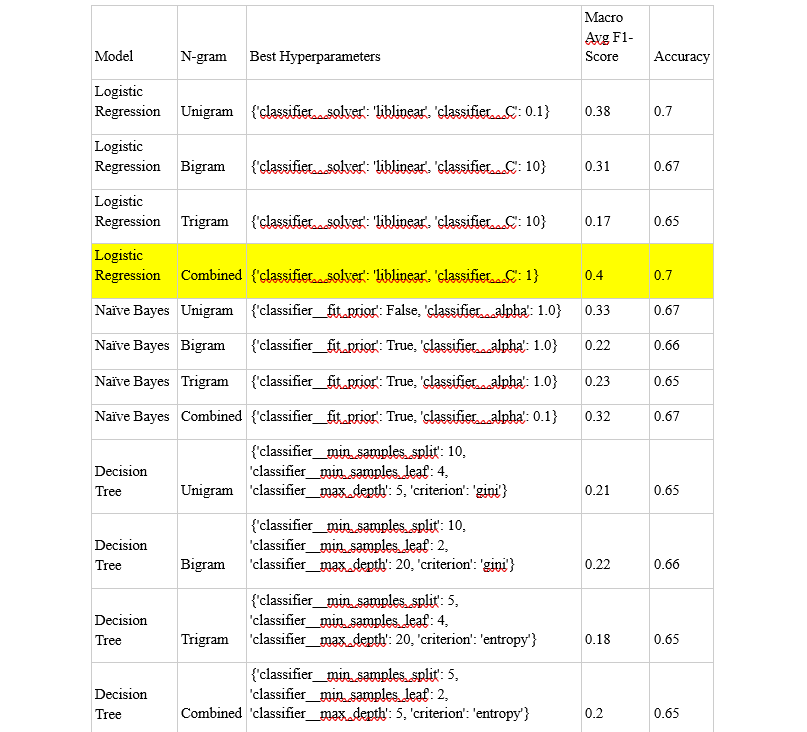

## Vector Space

Using various feature representations (Binary, Frequency Count, and TF-IDF) and their corresponding hyperparameters we found that Logistic Regression generally performs the best across different feature representations, with the highest macro average F1-score (0.39) achieved with binary representation, though the accuracy remains moderate (around 0.7). Naïve Bayes performs worst in terms of F1-score, with the highest value (0.4) for frequency count, but its accuracy is slightly lower (0.66-0.67) compared to Logistic Regression. The Decision Tree models show the lowest F1-scores across all feature representations, with values ranging from 0.21 to 0.25, and a relatively consistent accuracy of 0.65. These findings, as depicted in Appendix A.2, suggest that Logistic Regression, particularly with binary features, tends to perform better than Naïve Bayes and Decision Trees, although the overall classification performance could still be improved.

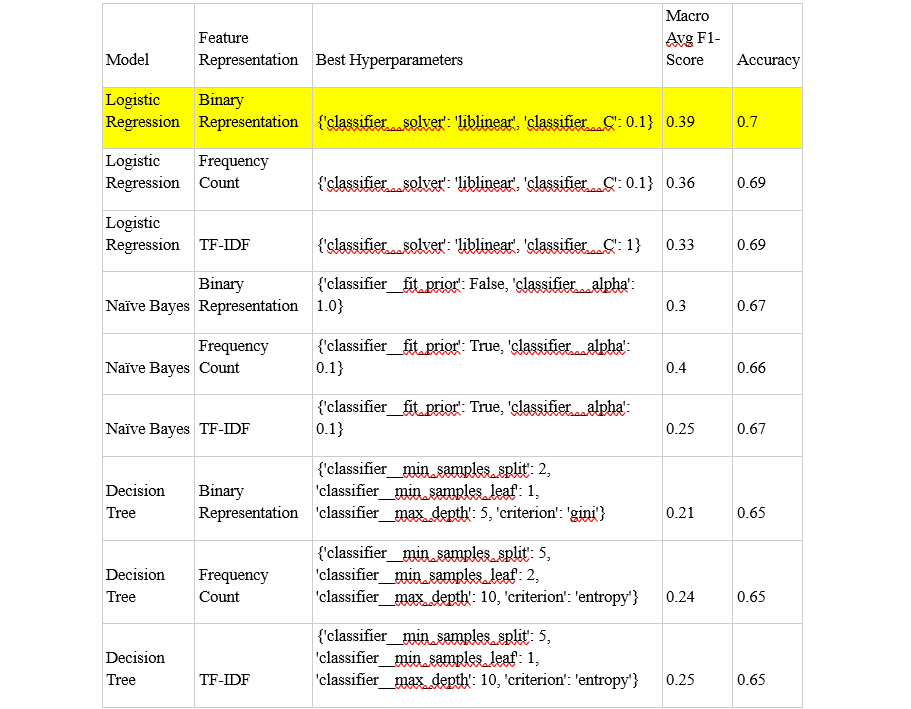

## Word Embeddings

The results, as depicted in Appendix A.3, indicate that Logistic Regression with Word2Vec embedding performs the best, with a macro average F1-score of 0.33 and an accuracy of 0.68. This is followed by Logistic Regression with GloVe, which performs notably worse, with an F1-score of 0.21 and accuracy of 0.65. Naïve Bayes, across both Word2Vec and GloVe embeddings, shows low performance, with the highest F1-score of 0.3 for Word2Vec, and a significantly lower accuracy of 0.42 for Word2Vec, improving to 0.61 with GloVe. The increased accuracy of Naïve Bayes with GloVe embedding (0.61) compared to Word2Vec (0.42) might be due to the fact that GloVe captures global word co-occurrence statistics, which can provide a richer representation of the semantic relationships between words. Naïve Bayes, which assumes feature independence and works well with probabilistic models, may benefit from this more comprehensive feature set when GloVe embeddings are used. Decision Tree models perform similarly across both embeddings, with very low F1-scores (0.17-0.16) and consistent accuracy (around 0.64). Overall, Logistic Regression with Word2Vec yields the most promising results, while Naïve Bayes and Decision Tree models struggle, particularly with Word2Vec, and GloVe embeddings generally result in lower performance. 

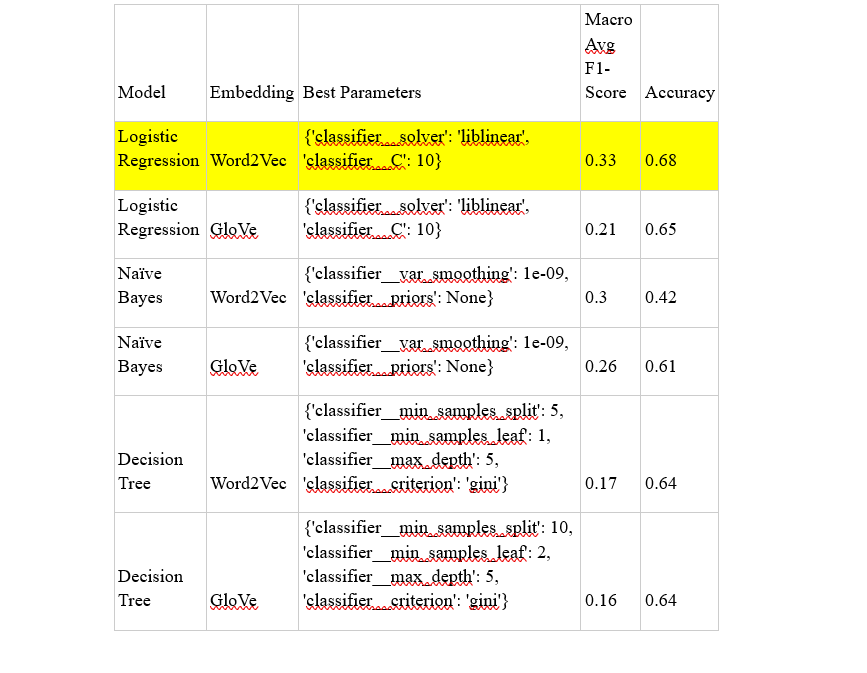

# Part 5 Modelling Text as a Sequence

## Introduction


While BoW-based models such as TF-IDF with Logistic Regression or SVM have shown decent performance, they inherently ignore the order and context of words in a sentence, which can limit model understanding of semantics. To address this, we experimented with Recurrent Neural Networks (RNNs), Long Short-Term Memory networks (LSTMs), and Gated Recurrent Units (GRUs), which are designed to process text as sequences.

## Data Representation

Text data was preprocessed using TensorFlow’s TextVectorization layer, which tokenized the text into integer sequences of fixed length (100). To evaluate the model's generalization, the vectorized data was then split into training and validation sets using an 80-20 split. This allowed the model to be trained on the majority of the data while still validating its performance on unseen examples. These sequences were then passed to an Embedding layer to produce dense word representations.

## Model Architectures

### Basic RNN

In [20]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [21]:
VOCAB_SIZE = 10000  # Number of unique words to keep
SEQUENCE_LENGTH = 100  # Fixed length of input sequences

Text data was preprocessed using TensorFlow’s TextVectorization layer, which tokenized the text into integer sequences of fixed length (100). A vocabulary size of 10,000 was chosen to retain only the most frequent and relevant words in the dataset while filtering out rare words and noise. 

In [22]:
model_rnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(100,), dtype=tf.int32),
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=64, mask_zero=True),
    tf.keras.layers.SimpleRNN(128, return_sequences=True, dropout=0.2),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])
model_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 100, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 681,541 (2.60 MB)

 Trainable params: 681,541 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

The model architecture consisted of two stacked SimpleRNN layers to deepen the network’s capacity for sequence modelling, followed by dense layers for classification:
- Embedding: Transforms integer sequences into 64-dimensional dense vectors.
- 	SimpleRNN: Two recurrent layers, the first returning sequences for the second.
-	Dense: Fully connected layers with ReLU activation and dropout to prevent overfitting.
-	Output layer uses softmax for multiclass classification (5 classes).
  
The model was compiled with categorical_crossentropy as the loss function and trained for 5 epochs. The dataset was preprocessed into padded sequences of length 100, and categorical labels were one-hot encoded.


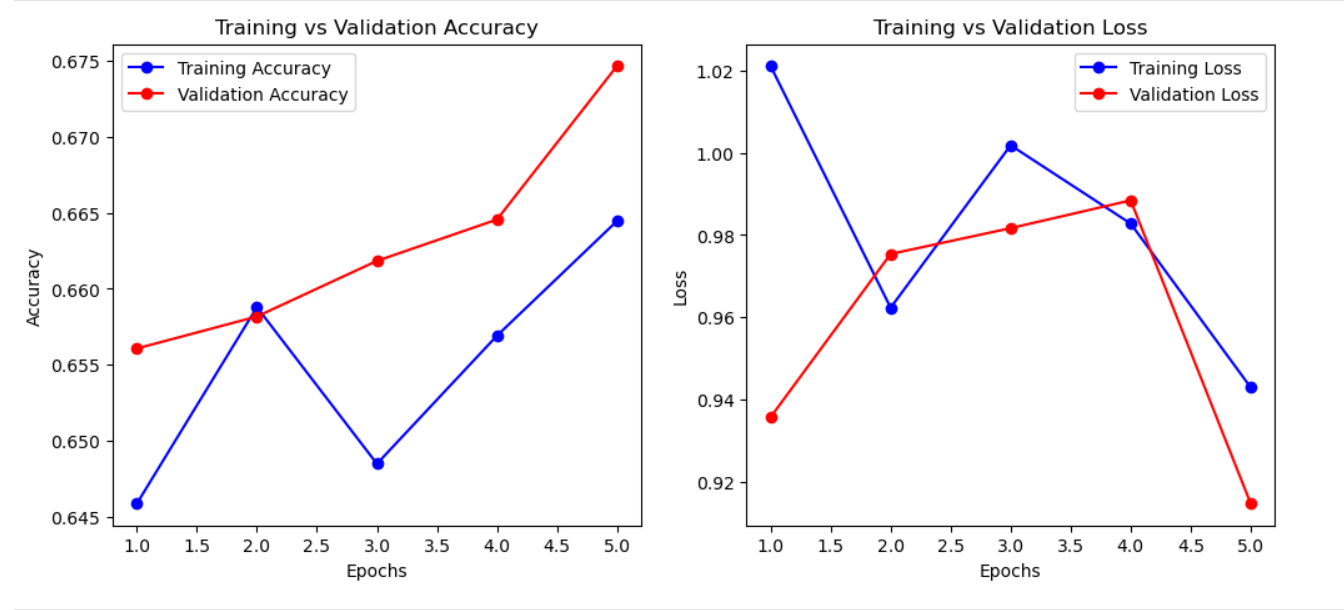

- Final Validation Accuracy: 67.46%
-	Kaggle Accuracy (on test set): 66.91%


Although the RNN showed reasonable performance, it plateaued early during training and validation, indicating limited capacity to model long-term dependencies. Compared to bag-of-words models (e.g., TF-IDF + SVM at ~60%), the RNN underperformed on the Kaggle test set. However, it served as a useful baseline for sequential modelling.

### GRU

GRU (Gated Recurrent Unit) networks are an improvement over basic RNNs, addressing the vanishing gradient problem by using gating mechanisms to better retain long-term dependencies.

In [24]:
model_gru = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(100,), dtype=tf.int32),
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True, recurrent_dropout=0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

model_gru.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 100, 256)            │         148,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         123,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 921,221 (3.51 MB)

 Trainable params: 921,221 (3.51 MB)

 Non-trainable params: 0 (0.00 B)

The GRU model was implemented using two stacked Bidirectional GRU layers:
- Bidirectional GRU: Allows the model to access both past and future context.
-	Embedding: Maps integer tokens into 64-dimensional dense vectors.
-	Dropout: Used to regularize and prevent overfitting.
-	Final layer outputs class probabilities across 5 categories.


The model was trained for 5 epochs using the Adam optimizer and categorical_crossentropy loss. As with previous models, padded sequences of length 100 were used.

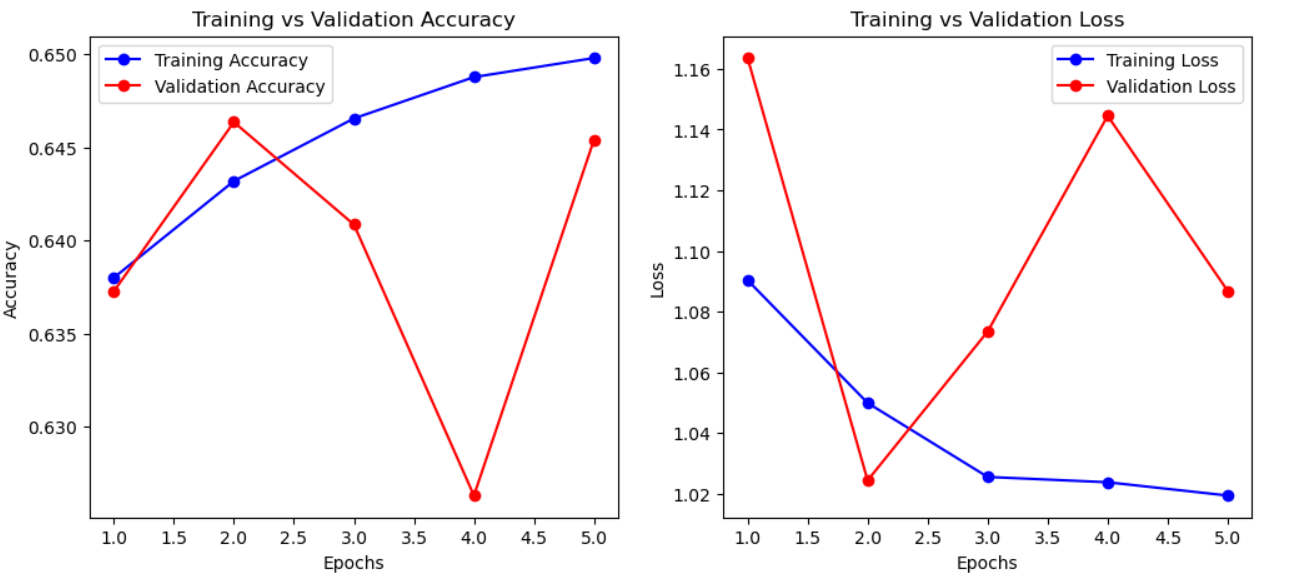

- Final Validation Accuracy: 64.54%
- Kaggle Accuracy: 64.14%

The GRU-based model performed slightly worse than the RNN baseline in terms of generalization, with validation accuracy showing fluctuations and no clear upward trend. The Kaggle score of 64.14% also trailed the RNN’s 66.91%. Despite GRUs being theoretically superior to simple RNNs in many tasks, they didn’t translate into clear gains in this experiment.


### LSTM

To better capture long-range dependencies in the text, we experimented with multiple LSTM architectures, varying both the depth of layers and number of training epochs. LSTMs are well-suited for sequential data as they mitigate the vanishing gradient problem and retain information over longer input sequences.
The best LSTM model was implemented using two stacked Bidirectional LSTM layers:


In [25]:
model_lstm11 = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(100,), dtype=tf.int32),
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True, recurrent_dropout=0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

model_lstm11.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 100, 256)            │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,010,565 (3.85 MB)

 Trainable params: 1,010,565 (3.85 MB)

 Non-trainable params: 0 (0.00 B)

- Bidirectional LSTM: This layer allows the model to process the input sequence in both forward and backward directions, capturing context from both past and future time steps. This helps the model understand the sequential dependencies in the data more effectively.
- Embedding Layer: The embedding layer maps integer tokens (word indices) into 64-dimensional dense vectors. These vectors capture semantic relationships between words and are learned during training.
- Dropout: A dropout rate of 0.3 was applied after the dense layer to help regularize the model and prevent overfitting. This technique randomly deactivates a fraction of the neurons during training to encourage more robust learning.
- Output Layer: The final dense layer with softmax activation outputs class probabilities across 5 categories. This allows the model to predict the class of an input sequence by assigning it a probability in one of the 5 categories.


The model was trained for 5 epochs using the Adam optimizer and categorical crossentropy loss. The input data consisted of padded sequences of length 100.

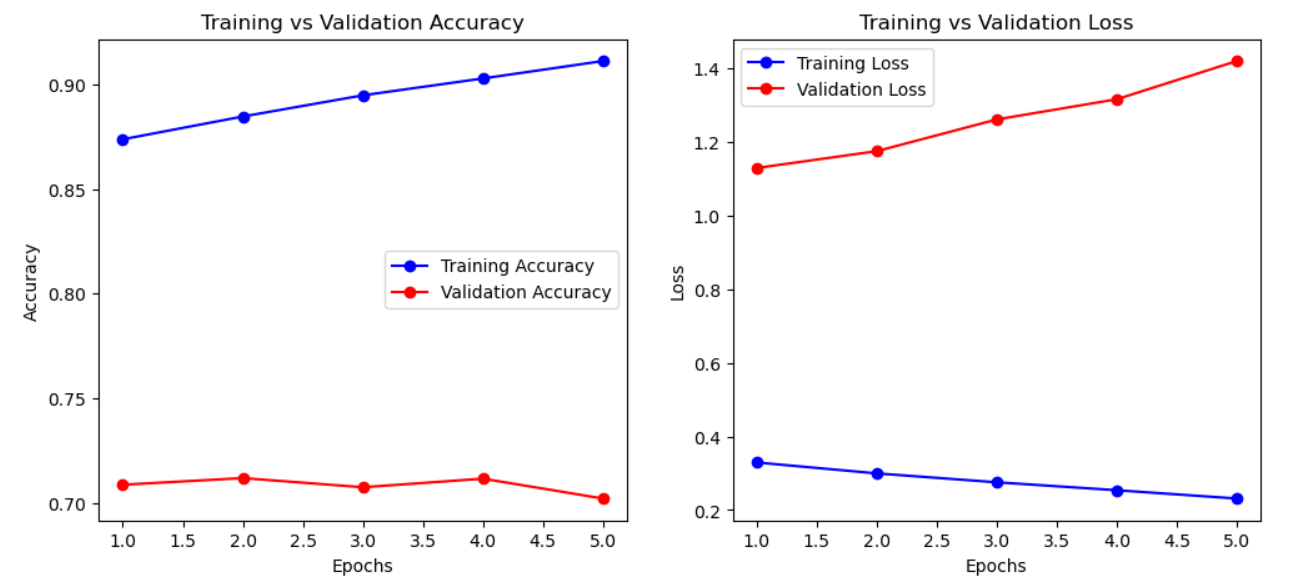

- Final Validation Accuracy: 70.21%
-	Kaggle Accuracy: 75.63%
  
The LSTM-based model performed the best, likely due to its ability to handle complex, long-term dependencies in text data, followed by GRU and Basic RNN in terms of both validation and Kaggle accuracy. However, depending on computational resources and real-time constraints, GRUs or Basic RNNs could still be viable alternatives for less complex tasks or where faster training is needed.


We experimented with multiple variations of LSTM models to determine the best architecture for classifying text data. The final table summarizes the key differences in architecture, performance metrics, and training conditions. These were the top 5 performing models based on Kaggle accuracy. For more details and to view the implementation of all the models, including basic RNN and GRU, please check the GitHub notebook.
https://github.com/athinsuresh/f20aa_cw2/blob/main/RNN.ipynb


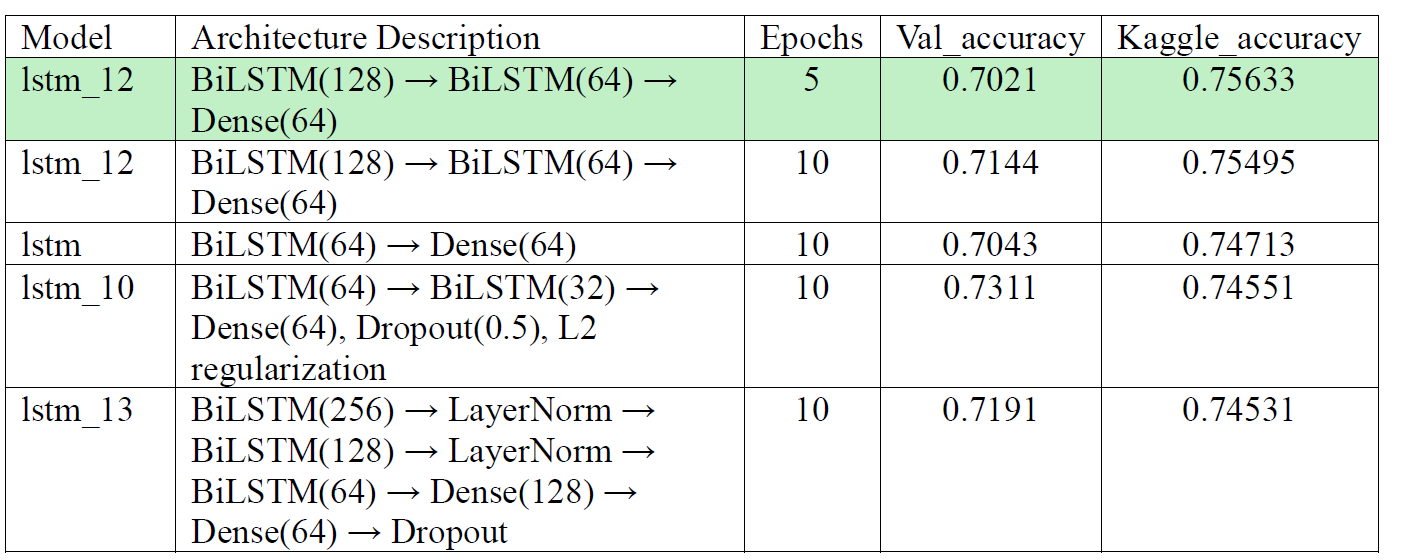

# Part 6 Topic Modelling

## Text Processing

For topic modelling there was some preprocessing done on the text. Firstly, 20 000 reviews were randomly selected from 1 star and 5 star reviews. The selected reviews then had all punctuations, numbers and stop words removed. The remaining string in the reviews were then tokenized and lemmatized before topic modelling was carried out.

In [1]:
import pandas as pd
data = '../Desktop/train_processed.csv'
train_df = pd.read_csv(data)
print(train_df.columns)

Index(['Score', 'Text', 'Text_Processed'], dtype='object')


In [3]:
one_star_df = train_df[train_df["Score"] == 1]
five_star_df = train_df[train_df["Score"] == 5]

# Sample 20,000 reviews from each subset
one_star_sampled = one_star_df.sample(n=20000, random_state=42)  # Use random_state for reproducibility
five_star_sampled = five_star_df.sample(n=20000, random_state=42)

In [5]:
print("One-star sample size:", one_star_sampled.shape[0])
print("Five-star sample size:", five_star_sampled.shape[0])

One-star sample size: 20000
Five-star sample size: 20000


In [7]:
one_star_sampled.head()

,Score,Text,Text_Processed
137270,1,"I'm sorry, but these are horrible! They taste...",sorry horrible taste burnt bitter neither husb...
184706,1,"Look at the ingredients: water, wheat, salt, ...",look ingredient water wheat salt sugar soy ing...
25238,1,That's right I thought that price was for a Ca...,right thought price case sixbr beyond greed in...
37407,1,have bought this product on two different occa...,bought product two different occasion time arr...
113937,1,"These walnuts were ""SO GROSS"", they tasted ran...",walnut gross taste rancid threw garbage honest...


## One-star rating

In [38]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load dataset
X_one_star = one_star_sampled['Text_Processed']

# Convert text to a document-term matrix
vectorizer = CountVectorizer(max_df=0.15, min_df=2, stop_words='english', max_features=5000)
X_dtm = vectorizer.fit_transform(X_one_star)

In [39]:
# Apply LDA for topic modeling 
lda15 = LatentDirichletAllocation(n_components=15, random_state=42) 
lda15.fit(X_dtm)
# Get feature names (words)
words = np.array(vectorizer.get_feature_names_out())

In [40]:
# Display top words in each topic
def display_topics(model, feature_names, num_words=10):
    sorting = np.argsort(model.components_, axis=1)[:, ::-1]  
    for topic_idx, topic in enumerate(model.components_):
        top_words = feature_names[sorting[topic_idx]][:num_words]
        print(f"\n🔹 Topic {topic_idx+1}:")
        print(", ".join(top_words))

display_topics(lda15, words, num_words=10)


🔹 Topic 1:
water, milk, flavor, drink, coconut, bottle, fat, new, better, tastes

🔹 Topic 2:
coffee, cup, flavor, kcups, beans, pods, cups, machine, tried, vanilla

🔹 Topic 3:
chocolate, sugar, cookies, sweet, bars, bar, hot, artificial, cookie, cocoa

🔹 Topic 4:
organic, hair, formula, gum, use, baby, licorice, products, used, best

🔹 Topic 5:
ingredients, corn, syrup, sugar, ingredient, natural, list, contains, products, label

🔹 Topic 6:
amazon, price, order, store, item, ordered, shipping, received, local, oz

🔹 Topic 7:
bad, smell, got, time, bought, try, really, tasted, batch, opened

🔹 Topic 8:
food, cat, dog, cats, eat, dogs, meat, chicken, foods, pet

🔹 Topic 9:
dog, treats, dogs, china, treat, chicken, small, products, chew, pieces

🔹 Topic 10:
tea, green, flavor, teas, tastes, lemon, love, tried, drink, bags

🔹 Topic 11:
money, waste, soup, flavor, bought, tasted, away, really, tried, chicken

🔹 Topic 12:
box, ordered, received, arrived, amazon, order, package, opened, bag,

Interpretation
- Topic 1: This topic suggests dissatisfaction with the taste or flavor of a drink.
- Topic 2: Complaints in this category likely revolve around the flavor of coffee, its strength, or perhaps a malfunction with the coffee machine or pods.
- Topic 3: This topic points to dissatisfaction with chocolate products, possibly due to excessive sweetness or the use of artificial ingredients.
- Topic 4: Complaints might relate to baby or organic products not living up to expectations.
- Topic 5: This topic highlights concerns with the ingredients in the product.
- Topic 6: Customers in this category likely complained about poor shipping experiences.
- Topic 7: Complaints in this topic suggest customers received defective or spoiled products.
- Topic 8: Customers might have been dissatisfied with pet food.
- Topic 9: Complaints may be about poor-quality dog treats, such as small sizes, bad ingredients, or concerns about the country of origin.
- Topic 10:Customers may have found the tea’s flavor unsatisfactory.
- Topic 11: This topic suggests customers were disappointed by the taste of soups or other similar products.
- Topic 12: Issues with damaged or poorly packaged goods.
- Topic 13: Complaints about the taste or effectiveness of health-related products.
- Topic 14: Reviews discussing issues with snacks, such as unpleasant taste, too much salt, or poor quality in the ingredients used.
- Topic 15: Complaints about the texture or flavor of food products.


In [41]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [42]:
from __future__ import print_function  # Ensures Python 2/3 compatibility (not needed in Python 3).
import pyLDAvis
import pyLDAvis.lda_model  # Importing LDA visualization module.
pyLDAvis.enable_notebook()  # Enables inline visualization in Jupyter Notebook.


In [43]:
pyLDAvis.lda_model.prepare(lda15, X_dtm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.151826 -0.112111       1        1  11.612609
11    -0.118531 -0.166289       2        1   9.603600
7     -0.111851  0.005013       3        1   8.429446
1      0.113844 -0.052024       4        1   7.427652
6      0.024849 -0.133474       5        1   7.414918
14     0.096421 -0.028722       6        1   6.961906
10     0.127575 -0.030212       7        1   6.614173
12     0.047424  0.093087       8        1   6.178731
4     -0.196485  0.222701       9        1   6.078598
0      0.073299  0.111395      10        1   5.835309
8     -0.164314 -0.068400      11        1   5.223058
9      0.142754  0.001117      12        1   5.161685
2      0.129577  0.080696      13        1   4.543799
3     -0.108358  0.090055      14        1   4.521351
13     0.095622 -0.012832      15        1   4.393165, topic_info=           Term         Freq        Total Category  logprob  loglift
849      coffee  4243.000000  4243.000000  Default  30.0000  30.0000
4460        tea  3101.000000  3101.000000  Default  29.0000  29.0000
769   chocolate  1856.000000  1856.000000  Default  28.0000  28.0000
1719       food  3929.000000  3929.000000  Default  27.0000  27.0000
1317        dog  2013.000000  2013.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4044      small   134.547421  1091.596080  Topic15  -5.2644   1.0316
2799        mix   115.695238   963.867314  Topic15  -5.4153   1.0051
4894      white   107.613873   618.931708  Topic15  -5.4877   1.3757
4627      tried   119.410741  2723.404358  Topic15  -5.3837  -0.0019
2632       make   105.787522  2000.056148  Topic15  -5.5049   0.1856

[1078 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
9         8  0.960557   acai
19        4  0.188824   acid
19        8  0.042753   acid
19        9  0.684042   acid
19       10  0.053441   acid
...     ...       ...    ...
4994     13  0.021059   zero
4994     14  0.017549   zero
4995      8  0.969287  zevia
4996      8  0.990769   zico
4999     11  0.940325  zukes

[4010 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 12, 8, 2, 7, 15, 11, 13, 5, 1, 9, 10, 3, 4, 14])

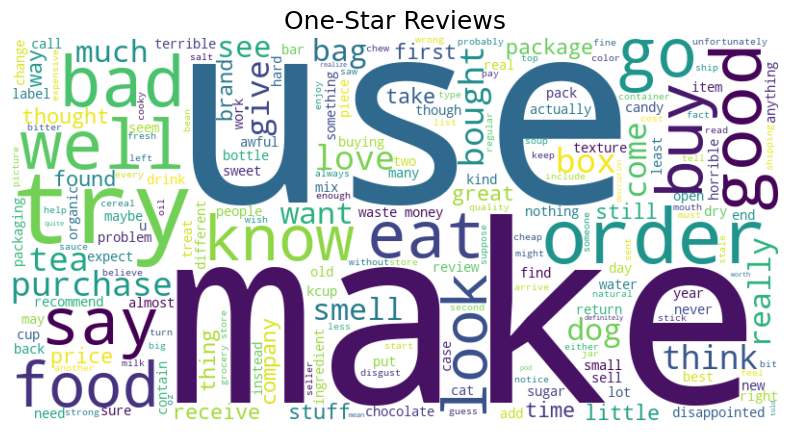

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all preprocessed one-star reviews into one string
one_star_text = " ".join(one_star_sampled["Text_Processed"].astype(str))

stopwords = set(STOPWORDS)
stopwords.update(["product", "amazon", "would", "get", "one", "even", "taste", "flavor", "br", "coffee"]) 

# Generate word cloud
one_star_wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=200,
    width=800,
    height=400
).generate(one_star_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(one_star_wc, interpolation='bilinear')
plt.title("One-Star Reviews", fontsize=18)
plt.axis('off')
plt.show()

## Five star rating

In [13]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load dataset
X_five_star = five_star_sampled['Text_Processed']

# Convert text to a document-term matrix
vectorizer = CountVectorizer(max_df=0.15, min_df=2, stop_words='english', max_features=5000)
X_dtm = vectorizer.fit_transform(X_five_star)

In [14]:
five_star_sampled.head()

,Score,Text,Text_Processed
115121,5,ALMOST AS GOOD AS FRESH AND BE SURE SEARCH ARO...,almost good fresh sure search around good butt...
259983,5,After multiple trials of various dry dog foods...,multiple trial various dry dog food one food d...
304052,5,I searched for ages for some drink between jus...,search age drink watersoda water various sweet...
104143,5,I was anxiously awaiting this flavor of coffee...,anxiously await flavor coffee yum yum yum real...
39184,5,I can never hold on to a box of these in my ho...,never hold box house day kid devour soon go an...


In [46]:
# Apply LDA for topic modeling 
lda15 = LatentDirichletAllocation(n_components=15, random_state=42) 
lda15.fit(X_dtm)
# Get feature names (words)
words = np.array(vectorizer.get_feature_names_out())

In [47]:
# Display top words in each topic
def display_topics(model, feature_names, num_words=10):
    sorting = np.argsort(model.components_, axis=1)[:, ::-1]  # Recompute sorting for the current model
    for topic_idx, topic in enumerate(model.components_):
        top_words = feature_names[sorting[topic_idx]][:num_words]
        print(f"\n🔹 Topic {topic_idx+1}:")
        print(", ".join(top_words))

display_topics(lda15, words, num_words=10)


🔹 Topic 1:
sweet, cereal, snack, sugar, eat, cookies, low, breakfast, healthy, ginger

🔹 Topic 2:
rice, fresh, bag, use, price, amazon, store, bags, time, buy

🔹 Topic 3:
amazon, price, order, buy, time, store, bought, ordered, shipping, best

🔹 Topic 4:
tea, green, teas, drink, cup, hot, best, iced, bags, black

🔹 Topic 5:
honey, weight, day, wine, diet, know, really, need, blood, work

🔹 Topic 6:
butter, peanut, nuts, really, seeds, eat, fat, snack, apple, little

🔹 Topic 7:
organic, baby, candy, day, time, formula, milk, used, taking, days

🔹 Topic 8:
food, dog, dogs, treats, loves, eat, old, treat, little, dry

🔹 Topic 9:
use, sauce, make, mix, add, bread, chicken, pasta, used, hot

🔹 Topic 10:
coffee, cup, strong, roast, tried, beans, best, blend, smooth, bold

🔹 Topic 11:
chocolate, bars, gluten, free, bar, best, dark, protein, cake, mix

🔹 Topic 12:
sugar, syrup, sweet, better, gum, flavors, natural, organic, artificial, best

🔹 Topic 13:
water, drink, coconut, use, milk, oil, 

Interpretation
- Topic 1: Reviews in this topic likely focuses on snacks and cereals.
- Topic 2:This topic suggests discussions about rice products, highlighting their freshness, packaging, and price.
- Topic 3: Many five-star reviews discussed positive experiences with shopping for products on Amazon.
- Topic 4: Reviews in this category highlighted the quality of tea, including green tea and black tea.
- Topic 5: This topic is unusual. Perhaps it includes reviews focused on health products, including honey and dietary supplements.
- Topic 6: Many five-star reviews featured positive comments about peanut butter, nuts, and other nut-based snacks.
- Topic 7: Reviews in this category discussed organic products for babies, such as formula and candy.
- Topic 8: This topic focused on dog food and treats.
- Topic 9: Reviews in this category highlighted various sauces and cooking ingredients.
- Topic 10: Customers praised the quality of coffee products.
- Topic 11: This topic included discussions about chocolate bars, protein bars, and gluten-free options.
- Topic 12: This topic focused on sweeteners such as syrup and gum.
- Topic 13: Many five-star reviews discussed coconut water, praising its refreshing taste, energy-boosting properties, and versatility.
- Topic 14: This topic contained positive reviews about various snacks like chips, crackers, and olive oil-based snacks.
- Topic 15: Reviews in this topic likely focused on pet food products, particularly for cats.


In [48]:
pyLDAvis.lda_model.prepare(lda15, X_dtm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.123402 -0.099158       1        1  12.465190
8     -0.073020 -0.022038       2        1  10.181192
7      0.141415  0.114456       3        1   8.882703
12    -0.029161 -0.013577       4        1   7.662631
9     -0.053512 -0.188157       5        1   7.510454
3     -0.082730 -0.151355       6        1   6.610843
1      0.068619 -0.089000       7        1   6.537164
0     -0.130024  0.124499       8        1   5.974368
13     0.001238 -0.015206       9        1   5.876027
11    -0.120216  0.011024      10        1   5.832138
10    -0.114554  0.078094      11        1   5.447782
6      0.130139  0.082138      12        1   4.912222
14     0.182207  0.011139      13        1   4.600407
5     -0.110505  0.108125      14        1   3.962518
4      0.066701  0.049018      15        1   3.544361, topic_info=           Term         Freq        Total Category  logprob  loglift
4438        tea  4730.000000  4730.000000  Default  30.0000  30.0000
855      coffee  4374.000000  4374.000000  Default  29.0000  29.0000
773   chocolate  1949.000000  1949.000000  Default  28.0000  28.0000
1703       food  3572.000000  3572.000000  Default  27.0000  27.0000
1304        dog  1660.000000  1660.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4722        use   107.605432  3205.730791  Topic15  -5.1682  -0.0544
371      better    90.895972  2168.951939  Topic15  -5.3370   0.1675
4728      using    77.127166  1091.927465  Topic15  -5.5012   0.6896
4843        way    77.687923  1494.066675  Topic15  -5.4940   0.3833
4724       used    72.120971  1930.745623  Topic15  -5.5684   0.0525

[1099 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
8        10  0.961081    acai
12        6  0.130738  access
12       13  0.828009  access
21        4  0.045443    acid
21        5  0.302957    acid
...     ...       ...     ...
4980     15  0.966604      ys
4990     10  0.970100   zevia
4991      4  0.982850    zico
4992     12  0.952639    zinc
4999      3  0.961521   zukes

[3871 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 8, 13, 10, 4, 2, 1, 14, 12, 11, 7, 15, 6, 5])

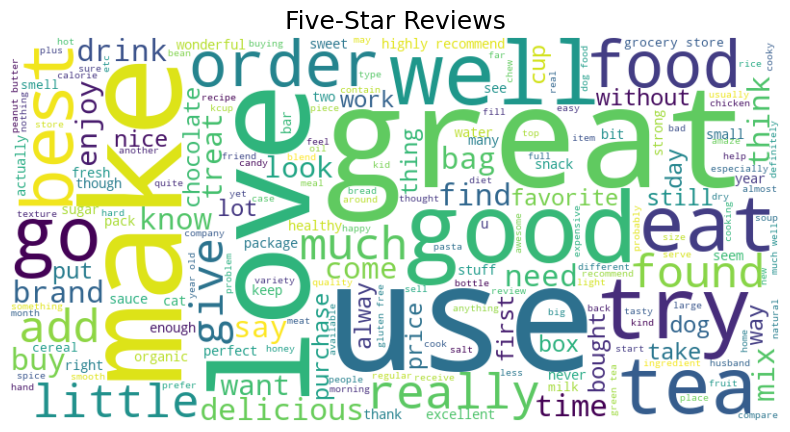

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all preprocessed one-star reviews into one string
five_star_text = " ".join(five_star_sampled["Text_Processed"].astype(str))

# Define stopwords (optional – extend as needed)
stopwords = set(STOPWORDS)
stopwords.update(["product", "amazon", "would", "get", "one", "even", "taste", "flavor", "br", "coffee"]) 

# Generate word cloud
five_star_wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=200,
    width=800,
    height=400
).generate(five_star_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(five_star_wc, interpolation='bilinear')
plt.title("Five-Star Reviews", fontsize=18)
plt.axis('off')
plt.show()
